In [1]:
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

from hive_parser.parser import Parser

## Directamente desde una query

In [3]:
query = "INSERT OVERWRITE TABLE t1 PARTITION(PARTITION_DT = '12/02/2019', b) \
        SELECT alias_t1.a,                              \
                t2.a t2_a,                         \
                IF (ISNOTNULL(t2.suma), SUM(t2.suma), 0) AS total, \
                CASE                               \
                    WHEN SUM(REGEXP_REPLACE(t6.a, 'hola', 'adios')) > COUNT(${hivevar:variable}) THEN t2.a   \
                    WHEN t6.b = 6 THEN ${hivevar:variable} \
                    ELSE 0                    \
                END AS case_when                                \
        FROM t1 alias_t1,                          \
            (SELECT tp_sub.a, SUM(tp_sub.b) AS suma FROM  \
                (SELECT t3.a, t1.b FROM t3 LEFT JOIN t1 ON t1.a = 'hola', t1) AS tp_sub       \
            ) AS t2,    \
            (SELECT NVL(b, 0) as b, 'columna' a_s FROM t4) AS sub_2          \
        WHERE (alias_t1.a = 'hola' AND alias_t1.where_column > alias_t1.c) \
        OR alias_t1.c < 100"

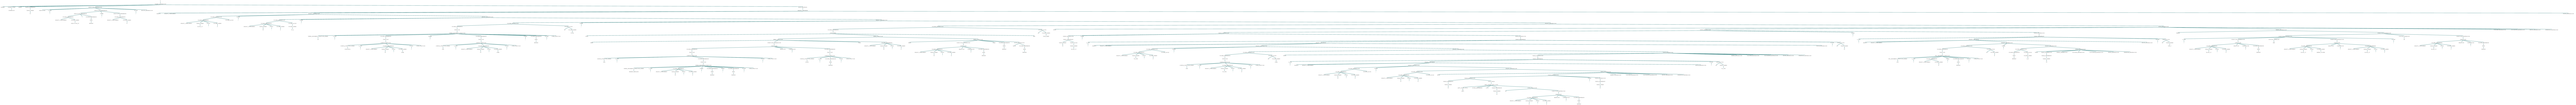

In [4]:
hv = Parser('conf/demo_conf.json')
parsed_tree = hv.parse_query(query)

parsed_tree.tree

In [5]:
%%time

renamed = hv.rename_tree()
print(renamed.rebuild_query())


INSERT OVERWRITE TABLE nueva_t1 PARTITION (PARTITION_DT = '12/02/2019',
                                           B)
SELECT ALIAS_T1.nuevo_a_t1,
       T2.nuevo_a_t3 T2_A,
       IF (ISNOTNULL (T2.SUMA),
           SUM (T2.SUMA), 0) AS TOTAL,
          CASE
              WHEN SUM (REGEXP_REPLACE (nueva_t6.nuevo_a_t6, 'hola', 'adios')) > COUNT (${hivevar:VARIABLE}) THEN T2.nuevo_a_t3
              WHEN nueva_t6.nuevo_b_t6 = 6 THEN ${hivevar:VARIABLE}
              ELSE 0
          END AS CASE_WHEN
FROM nueva_t1 ALIAS_T1,

  (SELECT TP_SUB.nuevo_a_t3,
          SUM (TP_SUB.nuevo_b_t1) AS SUMA
   FROM
     (SELECT nueva_t3.nuevo_a_t3,
             nueva_t1.nuevo_b_t1
      FROM nueva_t3
      LEFT JOIN nueva_t1 ON nueva_t1.nuevo_a_t1 = 'hola',
                            nueva_t1) AS TP_SUB) AS T2,

  (SELECT NVL (B, 0) AS B,
          'columna' A_S
   FROM nueva_t4) AS SUB_2
WHERE (ALIAS_T1.nuevo_a_t1 = 'hola'
       AND ALIAS_T1.nueva_where > ALIAS_T1.nuevo_c_t1)
  OR ALIAS_T1.nuevo_c

## Desde ficheros que contienen queries

#### Configurado en el fichero de configuracion

In [8]:
hv = Parser('conf/demo_conf.json')

queries = hv.load_queries()

hv.save_renamed(queries)

INFO hive_parser 2017-11-20 14:43:35,431 Todas las queries han sido correctamente renombradas y almacenadas en la ruta data/query_output


#### Configurado por parametro

In [7]:
hv = Parser('conf/demo_conf.json')

queries = hv.load_queries('data/query_input')

hv.save_renamed(queries, 'data/query_output')

INFO hive_parser 2017-11-20 14:43:24,649 Todas las queries han sido correctamente renombradas y almacenadas en la ruta data/query_output
